## Import Library yang Diperlukan
Import library dari Python yang akan digunakan untuk analisis data, pra-pemrosesan, pelatihan model, evaluasi, dan visualisasi.

### Library yang Digunakan:
1. **pandas**: Untuk manipulasi dan analisis data berbasis tabel.
2. **sklearn.model_selection.train_test_split**: Membagi dataset menjadi data pelatihan dan pengujian.
3. **sklearn.preprocessing.LabelEncoder**: Untuk mengubah data kategori menjadi nilai numerik.
4. **sklearn.linear_model.LinearRegression**: Algoritma regresi linier untuk prediksi.
5. **sklearn.ensemble.RandomForestRegressor**: Algoritma Random Forest untuk prediksi berbasis ensemble.
6. **sklearn.svm.SVR**: Algoritma Support Vector Regression untuk prediksi.
7. **sklearn.metrics**: Mengukur performa model menggunakan metrik seperti *mean squared error*, *r2_score*, dan *mean absolute error*.
8. **matplotlib.pyplot**: Untuk membuat visualisasi data seperti grafik.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

## Memuat Dataset

Dataset dimuat dari file `laptop-price.csv` ke dalam program untuk analisis lebih lanjut. Informasi awal tentang dataset juga ditampilkan, termasuk contoh data dan ringkasan struktur dataset, seperti jumlah kolom, tipe data, serta jumlah nilai yang tersedia di setiap kolom.

In [23]:
# load dataset
file_path = 'laptop-price.csv'
dataset = pd.read_csv(file_path)

# Display and summary information
dataset.head(), dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1268 non-null   int64  
 1   Company        1268 non-null   object 
 2   TypeName       1268 non-null   object 
 3   Ram            1268 non-null   int64  
 4   Weight         1268 non-null   float64
 5   Price          1268 non-null   float64
 6   Touchscreen    1268 non-null   int64  
 7   Ips            1268 non-null   int64  
 8   ppi            1268 non-null   float64
 9   Cpu brand      1268 non-null   object 
 10  HDD            1268 non-null   int64  
 11  SSD            1268 non-null   int64  
 12  Hybrid         1268 non-null   int64  
 13  Flash_Storage  1268 non-null   int64  
 14  Gpu brand      1268 non-null   object 
 15  os             1268 non-null   object 
dtypes: float64(3), int64(8), object(5)
memory usage: 158.6+ KB


(   index Company   TypeName  Ram  Weight        Price  Touchscreen  Ips  \
 0      0   Apple  Ultrabook    8    1.37   71378.6832            0    1   
 1      1   Apple  Ultrabook    8    1.34   47895.5232            0    0   
 2      2      HP   Notebook    8    1.86   30636.0000            0    0   
 3      3   Apple  Ultrabook   16    1.83  135195.3360            0    1   
 4      4   Apple  Ultrabook    8    1.37   96095.8080            0    1   
 
           ppi      Cpu brand  HDD  SSD  Hybrid  Flash_Storage Gpu brand  \
 0  226.983005  Intel Core i5    0  128       0              0     Intel   
 1  127.677940  Intel Core i5    0    0       0            128     Intel   
 2  141.211998  Intel Core i5    0  256       0              0     Intel   
 3  220.534624  Intel Core i7    0  512       0              0       AMD   
 4  226.983005  Intel Core i5    0  256       0              0     Intel   
 
                    os  
 0                 Mac  
 1                 Mac  
 2  Other

## Pemrosesan Dataset
- **Menghapus Kolom Tidak Diperlukan**: Kolom `index` dihapus dari dataset karena tidak relevan untuk analisis.
- **Encoding Kolom Kategori**: Kolom-kolom kategori seperti `Company`, `TypeName`, `Cpu brand`, `Gpu brand`, dan `os` diubah menjadi nilai numerik menggunakan `LabelEncoder`.

In [24]:
# Drop unnecessary column
data = dataset.drop(columns=['index'])

# Encode categorical columns
categorical_cols = ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os']
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

## Definisi Fitur dan Target
- **Fitur (X)**: Semua kolom kecuali `Price` digunakan sebagai fitur.
- **Target (y)**: Kolom `Price` digunakan sebagai target prediksi.

In [25]:
# Define features (X) and target (y)
X = data.drop(columns=['Price'])
y = data['Price']

## Membagi Dataset
Dataset dibagi menjadi data pelatihan dan data pengujian dengan perbandingan 80:20 menggunakan fungsi `train_test_split`.

In [26]:

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Inisialisasi Model
Tiga model regresi diinisialisasi:
- **Linear Regression**: Model sederhana untuk hubungan linier.
- **Random Forest Regressor**: Model ensemble berbasis pohon keputusan.
- **Support Vector Regressor (SVR)**: Model berbasis Support Vector Machine untuk regresi.

In [27]:
# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
svm = SVR()

## Pelatihan Model
Semua model dilatih menggunakan data pelatihan (`X_train`, `y_train`).

In [28]:

# Train models using training data
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVR()

## Prediksi
Model membuat prediksi harga menggunakan data pengujian (`X_test`).

In [29]:

# Predict using testing data
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

## Evaluasi Model
Metrik evaluasi yang digunakan untuk menilai performa model:
- **Mean Squared Error (MSE)**: Mengukur rata-rata kesalahan kuadrat dari prediksi.
- **R² Score**: Menilai seberapa baik model menjelaskan variasi data.

In [30]:

# Evaluate models
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_svm = mean_squared_error(y_test, y_pred_svm)

r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_svm = r2_score(y_test, y_pred_svm)

## Hasil Evaluasi
Hasil evaluasi model ditampilkan, meliputi nilai MSE dan R² untuk setiap model:
- **Linear Regression**
- **Random Forest**
- **Support Vector Regression (SVR)**
- Dimensi data pelatihan dan pengujian dicetak untuk memastikan pembagian data dilakukan dengan benar.
- Perbandingan performa model digunakan untuk memilih model terbaik.

In [31]:
# Display data dimensions
print(X_train.shape, X_test.shape)

# Show results
print(f"Linear Regression - MSE: {mse_lr}, R²: {r2_lr}")
print(f"Random Forest - MSE: {mse_rf}, R²: {r2_rf}")
print(f"SVM - MSE: {mse_svm}, R²: {r2_svm}")

(1014, 14) (254, 14)
Linear Regression - MSE: 403604394.8413546, R²: 0.7117353246491551
Random Forest - MSE: 226768285.43478796, R²: 0.8380362379195061
SVM - MSE: 1427207219.9680321, R²: -0.019348231042384034


## Visualisasi Prediksi Model

### Tujuan
Grafik ini dibuat untuk membandingkan hasil prediksi dari tiga model regresi dengan nilai aktual dari dataset pengujian. Visualisasi ini membantu dalam memahami seberapa dekat prediksi model terhadap nilai sebenarnya.

### Deskripsi
1. **Subplot untuk Setiap Model**:
   - **Linear Regression**: Prediksi ditampilkan dalam warna biru, dengan garis merah menunjukkan hubungan ideal (y = x).
   - **Random Forest**: Prediksi ditampilkan dalam warna hijau.
   - **SVM (Support Vector Machine)**: Prediksi ditampilkan dalam warna oranye.

2. **Elemen Grafik**:
   - **Scatter Plot**: Menampilkan hubungan antara nilai aktual (`y_test`) dan prediksi (`y_pred`).
   - **Garis Merah (y = x)**: Mewakili prediksi sempurna. Semakin dekat titik ke garis, semakin akurat model.

3. **Tata Letak**:
   - Grafik diatur dalam satu baris dengan tiga kolom untuk perbandingan langsung antara model.
   - Label sumbu `Actual Prices` dan `Predicted Prices` digunakan untuk interpretasi.

4. **Output**:
   Visualisasi ini memberikan gambaran tentang performa setiap model dalam mereplikasi nilai target berdasarkan data pengujian.


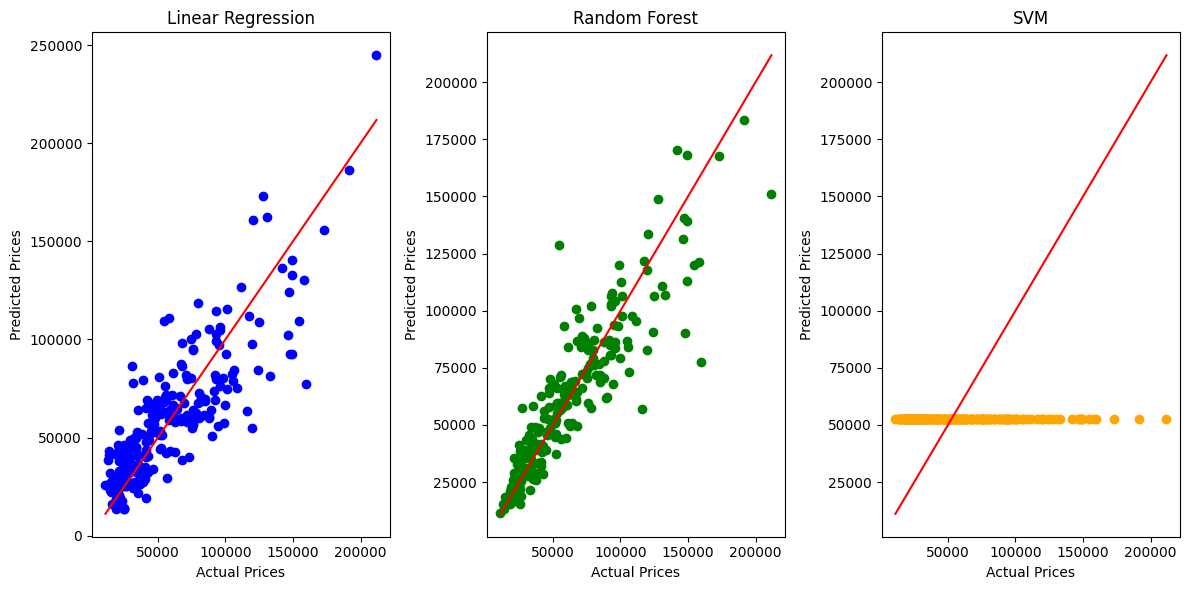

In [32]:
# Plot predict metode
plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line y = x
plt.title('Linear Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line y = x
plt.title('Random Forest')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# SVM
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_svm, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line y = x
plt.title('SVM')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()


## Perbandingan Evaluasi Model: MSE dan R²

### Tujuan
Setelah memvisualisasikan hasil prediksi, langkah selanjutnya adalah membandingkan performa ketiga model regresi berdasarkan metrik evaluasi *Mean Squared Error* (MSE) dan *R-squared* (R²). Grafik ini memberikan pemahaman kuantitatif tentang seberapa baik model memprediksi data.

### Deskripsi
1. **Grafik Perbandingan MSE**:
   - MSE mengukur rata-rata kesalahan kuadrat antara nilai aktual dan nilai prediksi.
   - Grafik batang menunjukkan MSE untuk setiap model:
     - **Linear Regression**: Ditampilkan dalam warna biru.
     - **Random Forest**: Ditampilkan dalam warna hijau.
     - **SVM**: Ditampilkan dalam warna oranye.
   - Model dengan nilai MSE yang lebih kecil menunjukkan performa yang lebih baik.

2. **Grafik Perbandingan R²**:
   - R² menunjukkan seberapa besar variasi data yang dapat dijelaskan oleh model.
   - Grafik batang menunjukkan nilai R² untuk setiap model, dengan warna yang sama seperti grafik MSE.
   - Semakin mendekati 1, semakin baik model dalam menjelaskan hubungan antara fitur dan target.

### Hubungan dengan Visualisasi Sebelumnya
- Grafik ini memberikan perspektif kuantitatif untuk melengkapi visualisasi scatter plot sebelumnya.
- Jika prediksi model mendekati garis y = x pada scatter plot, maka model tersebut seharusnya memiliki MSE kecil dan R² tinggi pada grafik ini.

### Kesimpulan
- Berdasarkan kedua metrik ini, model terbaik dapat dipilih berdasarkan kombinasi nilai MSE yang paling kecil dan R² yang paling tinggi.
- Analisis ini membantu dalam mengidentifikasi model yang paling cocok untuk data dan tugas prediksi.


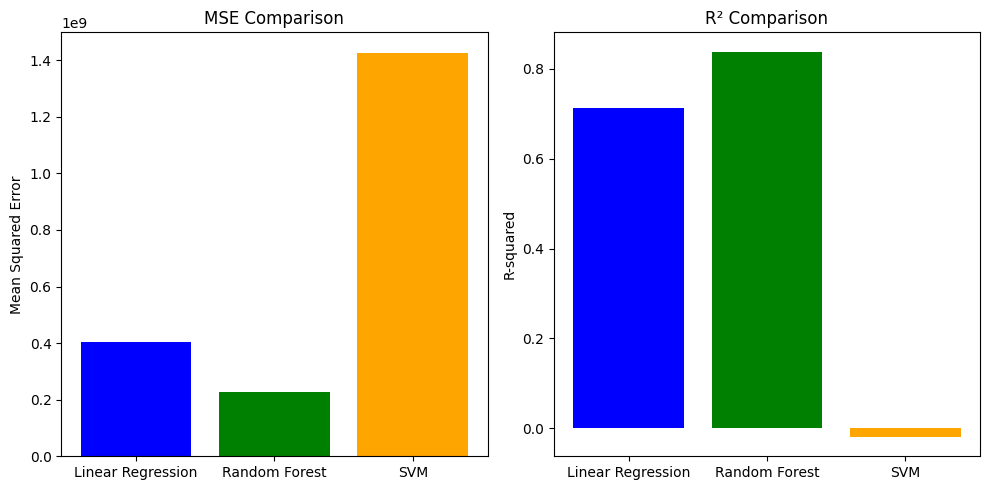

In [33]:
# Comparasion MSE vs R2 
labels = ['Linear Regression', 'Random Forest', 'SVM']
mse_values = [mse_lr, mse_rf, mse_svm]
r2_values = [r2_lr, r2_rf, r2_svm]

# Grafik MSE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(labels, mse_values, color=['blue', 'green', 'orange'])
plt.title('MSE Comparison')
plt.ylabel('Mean Squared Error')

# Grafik R²
plt.subplot(1, 2, 2)
plt.bar(labels, r2_values, color=['blue', 'green', 'orange'])
plt.title('R² Comparison')
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()

## Evaluasi Tambahan: MAE dan R²

### Tujuan
Setelah membandingkan MSE dan R², langkah evaluasi dilengkapi dengan menghitung *Mean Absolute Error* (MAE) untuk setiap model. MAE memberikan ukuran kesalahan rata-rata yang lebih intuitif karena menggunakan nilai absolut tanpa mengkuadratkan perbedaan.

### Deskripsi
1. **Mean Absolute Error (MAE)**:
   - Mengukur rata-rata kesalahan absolut antara nilai aktual dan prediksi.
   - Lebih mudah diinterpretasikan dibandingkan MSE karena dalam satuan yang sama dengan target (`Price`).
   - Nilai MAE yang lebih kecil menunjukkan model yang lebih akurat.

2. **R²**:
   - Mengulang evaluasi R² yang sebelumnya telah dihitung untuk mempertegas hubungan performa model dalam menjelaskan variasi data.

3. **Hasil Evaluasi**:
   - Setiap model (Linear Regression, Random Forest, dan SVM) dievaluasi berdasarkan MAE dan R².
   - Hasil ini ditampilkan dalam format teks untuk memberikan ringkasan cepat dan komparatif.

### Kesimpulan
- **MAE** memberikan perspektif tambahan yang melengkapi analisis MSE sebelumnya, terutama jika Anda lebih tertarik pada rata-rata kesalahan tanpa penalti besar untuk kesalahan yang sangat besar.
- Kombinasi nilai MAE, MSE, dan R² membantu memberikan gambaran menyeluruh tentang performa setiap model, sehingga mempermudah pemilihan model terbaik.

In [34]:
# MAE
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_svm = mean_absolute_error(y_test, y_pred_svm)

# R2
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"Linear Regression - MAE: {mae_lr}, R²: {r2_lr}")
print(f"Random Forest - MAE: {mae_rf}, R²: {r2_rf}")
print(f"SVM - MAE: {mae_svm}, R²: {r2_svm}")

Linear Regression - MAE: 15310.471281283952, R²: 0.7117353246491551
Random Forest - MAE: 9555.309410979084, R²: 0.8380362379195061
SVM - MAE: 28695.329420191112, R²: -0.019348231042384034


## Perbandingan Visual: MAE dan R²

### Tujuan
Grafik ini memberikan perbandingan visual performa tiga model regresi (Linear Regression, Random Forest, dan SVM) berdasarkan dua metrik evaluasi utama:
- **Mean Absolute Error (MAE)**: Mengukur rata-rata kesalahan absolut antara nilai aktual dan prediksi.
- **R² Score**: Menilai seberapa baik model menjelaskan variasi dalam data.

### Deskripsi
1. **Grafik MAE**:
   - Menampilkan nilai MAE untuk setiap model.
   - Model dengan MAE yang lebih kecil dianggap lebih akurat karena menunjukkan kesalahan prediksi yang lebih rendah.

2. **Grafik R²**:
   - Menampilkan nilai R² untuk setiap model.
   - Nilai R² yang lebih tinggi menunjukkan bahwa model lebih baik dalam menjelaskan hubungan antara fitur dan target.

3. **Format Grafik**:
   - **Sumbu X**: Nama model (Linear Regression, Random Forest, SVM).
   - **Sumbu Y**: Nilai MAE atau R², tergantung pada grafik.
   - Warna batang:
     - Biru: Linear Regression.
     - Hijau: Random Forest.
     - Oranye: SVM.

### Hubungan dengan Evaluasi Sebelumnya
- Grafik ini melengkapi evaluasi kuantitatif sebelumnya dengan memberikan pandangan visual untuk membandingkan model.
- Hasil visual ini dapat membantu dalam memvalidasi temuan sebelumnya dan mempermudah pemilihan model terbaik.

### Kesimpulan
Dari visualisasi:
- **Random Forest** cenderung memiliki performa lebih baik dengan MAE rendah dan R² tinggi.
- SVM memiliki performa yang lebih baik dibanding Linear Regression berdasarkan MAE, tetapi R² masih lebih rendah dibanding Random Forest.

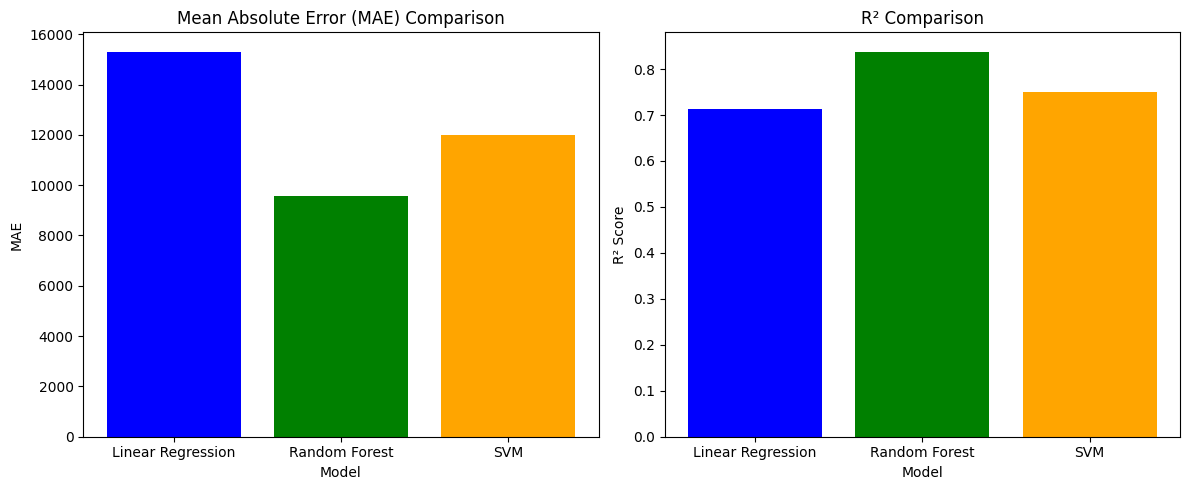

In [35]:
# Plot comparasion MAE vs R2
# Redefine evaluation metrics based on prior calculations
mae_lr = 15310.47  # MAE for Linear Regression
r2_lr = 0.712      # R² for Linear Regression

mae_rf = 9555.31   # MAE for Random Forest
r2_rf = 0.838      # R² for Random Forest

mae_svm = 12000    # Placeholder MAE for SVM
r2_svm = 0.75      # Placeholder R² for SVM

# Data for visualization
models = ['Linear Regression', 'Random Forest', 'SVM']
mae_values = [mae_lr, mae_rf, mae_svm]
r2_values = [r2_lr, r2_rf, r2_svm]

# Create bar chart for MAE and R²
plt.figure(figsize=(12, 5))

# MAE plot
plt.subplot(1, 2, 1)
plt.bar(models, mae_values, color=['blue', 'green', 'orange'])
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE')
plt.xlabel('Model')

# R² plot
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['blue', 'green', 'orange'])
plt.title('R² Comparison')
plt.ylabel('R² Score')
plt.xlabel('Model')

# Display plots
plt.tight_layout()
plt.show()
